In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

from tensorflow import keras
print(tf.__version__)

2.0.0-rc1


In [ ]:
#https://github.com/sns-sdks/python-facebook
#https://stackabuse.com/python-for-nlp-working-with-facebook-fasttext-library/
#https://stackabuse.com/analyzing-api-data-with-mongodb-seaborn-and-matplotlib/
#https://stackabuse.com/creating-a-neural-network-from-scratch-in-python-multi-class-classification/
#https://stackabuse.com/the-naive-bayes-algorithm-in-python-with-scikit-learn/
#https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/
#https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/
#https://stackabuse.com/cross-validation-and-grid-search-for-model-selection-in-python/ soo important 
#https://stackabuse.com/text-summarization-with-nltk-in-python/
#https://www.kaggle.com/sanikamal/text-classification-with-python-and-keras
#https://realpython.com/python-keras-text-classification/
#https://stackabuse.com/python-for-nlp-word-embeddings-for-deep-learning-in-keras/
#https://stackabuse.com/python-for-nlp-movie-sentiment-analysis-using-deep-learning-in-keras/
#https://www.mydatahack.com/how-to-get-data-from-mongodb-with-python/
#https://medium.com/google-cloud/sentiment-analysis-of-comments-on-lhls-facebook-page-9db8b3a60eb3
#https://www.kdnuggets.com/2017/06/6-interesting-things-facebook-python.html
# https://machinelearningmastery.com/time-series-forecasting/
#https://www.tensorflow.org/tutorials/structured_data/time_series
#https://machinelearningmastery.com/time-series-forecasting/
#https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/
#https://www.kdnuggets.com/2019/05/machine-learning-time-series-forecasting.html
#https://www.quora.com/What-do-samples-features-time-steps-mean-in-LSTM
#examples/lstm/imdb-classifier/imdb-attention.py
#https://blog.skymind.ai/convolutional-lstms-for-sea-temperature-forecasting/
#https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/
#https://machinelearningmastery.com/develop-bidirectional-lstm-sequence-classification-python-keras/
#https://medium.com/datadriveninvestor/multivariate-time-series-using-rnn-with-keras-7f78f4488679
#https://link.springer.com/chapter/10.1007/978-3-319-57454-7_13
#https://www.cs.umb.edu/~ding/papers/08023406.pdf
#https://www.tensorflow.org/tutorials/text/word_embeddings
#https://www.tensorflow.org/tutorials/structured_data/time_series
#https://machinelearningmastery.com/how-to-develop-lstm-models-for-multi-step-time-series-forecasting-of-household-power-consumption/
#https://machinelearningmastery.com/how-to-develop-lstm-models-for-multi-step-time-series-forecasting-of-household-power-consumption/

In [3]:
import matplotlib.pyplot as plt
import tensorflow as tf
layers = tf.keras.layers
import numpy as np
print(tf.__version__)

2.0.0-rc1


In [4]:
mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

4423680/4422102 [==============================] - 2s 1us/step


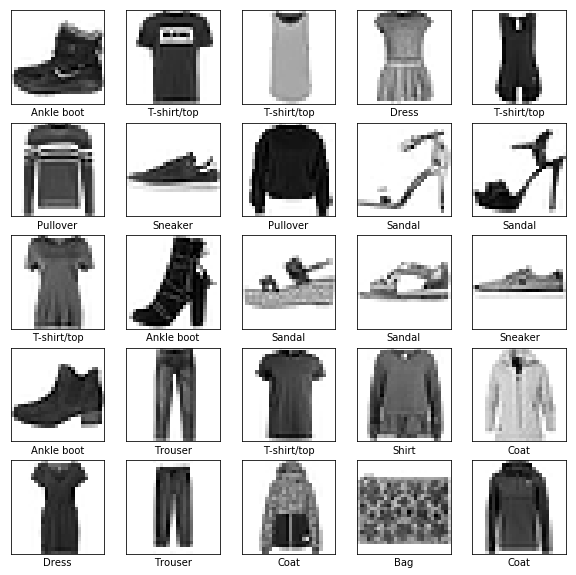

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [8]:
model = tf.keras.Sequential()
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam',
 loss='sparse_categorical_crossentropy',
 metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 27s 451us/sample - loss: 0.5139 - accuracy: 0.8179
Epoch 2/5
60000/60000 [==============================] - 9s 148us/sample - loss: 0.3823 - accuracy: 0.8600
Epoch 3/5
60000/60000 [==============================] - 9s 149us/sample - loss: 0.3491 - accuracy: 0.8722
Epoch 4/5
60000/60000 [==============================] - 9s 146us/sample - loss: 0.3204 - accuracy: 0.8825
Epoch 5/5
60000/60000 [==============================] - 8s 139us/sample - loss: 0.3048 - accuracy: 0.8877


In [9]:
model.evaluate(x_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.35344925533533095, 0.8722]

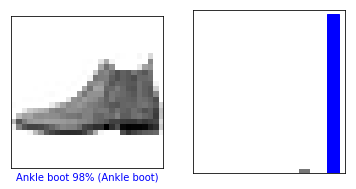

Actual label: Ankle boot
Predicted label: Ankle boot


In [16]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
 
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
 
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],100*np.max(predictions_array),
     class_names[true_label]),
       color=color)
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)
 
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')
    
predictions = model.predict(x_test)
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions, y_test)
plt.show()
predicted_label = class_names[np.argmax(predictions[0])]
print('Actual label:', class_names[y_test[0]]) 
print('Predicted label:', predicted_label)

Train: 0.002, Test: 0.004


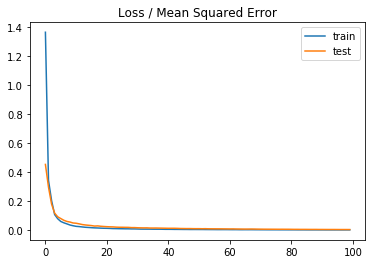

In [5]:
# mlp for regression with mse loss function
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from matplotlib import pyplot
# generate regression dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=1)
# standardize dataset
X = StandardScaler().fit_transform(X)
y = StandardScaler().fit_transform(y.reshape(len(y),1))[:,0]
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(25, input_dim=20, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='mean_squared_error', optimizer=opt)
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)
# evaluate the model
train_mse = model.evaluate(trainX, trainy, verbose=0)
test_mse = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))
# plot loss during training
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()


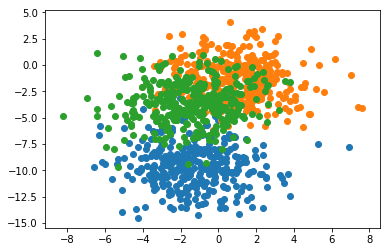

In [6]:
# scatter plot of blobs dataset
from sklearn.datasets.samples_generator import make_blobs
from numpy import where
from matplotlib import pyplot
# generate dataset
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
# select indices of points with each class label
for i in range(3):
	samples_ix = where(y == i)
	pyplot.scatter(X[samples_ix, 0], X[samples_ix, 1])
pyplot.show()

Train: 0.830, Test: 0.816


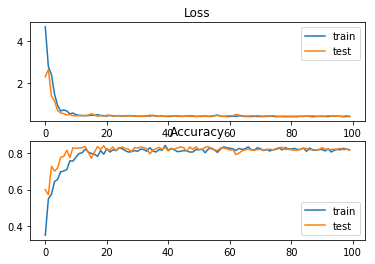

In [8]:
# mlp for the blobs multi-class classification problem with cross-entropy loss
from sklearn.datasets.samples_generator import make_blobs
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical
from matplotlib import pyplot
# generate 2d classification dataset
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
# one hot encode output variable
y = to_categorical(y)
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))
# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()


Train: 0.830, Test: 0.818


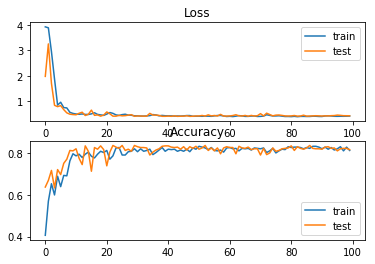

In [9]:
# mlp for the blobs multi-class classification problem with sparse cross-entropy loss
from sklearn.datasets.samples_generator import make_blobs
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from matplotlib import pyplot
# generate 2d classification dataset
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))
# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()

In [15]:
print(__doc__)

# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics

# The digits dataset
digits = datasets.load_digits()

# The data that we are interested in is made of 8x8 images of digits, let's
# have a look at the first 4 images, stored in the `images` attribute of the
# dataset.  If we were working from image files, we could load them using
# matplotlib.pyplot.imread.  Note that each image must have the same size. For these
# images, we know which digit they represent: it is given in the 'target' of
# the dataset.
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.001)

# We learn the digits on the first half of the digits
classifier.fit(data[:n_samples // 2], digits.target[:n_samples // 2])

# Now predict the value of the digit on the second half:
expected = digits.target[n_samples // 2:]
predicted = classifier.predict(data[n_samples // 2:])

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()

Automatically created module for IPython interactive environment
Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

   micro avg       0.97      0.97      0.97       899
   macro avg       0.97

<Figure size 640x480 with 8 Axes>

In [14]:
from sklearn import  datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
digits = datasets.load_digits()
X, y = digits.data, digits.target
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [1, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"],
              "n_estimators": [10, 20, 40, 80]}
gs = GridSearchCV(RandomForestClassifier(), param_grid=param_grid)
gs.fit(X, y)

C:\Users\rzouga\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\rzouga\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:542: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

In [16]:
from sklearn import svm, datasets
from spark_sklearn import GridSearchCV
iris = datasets.load_iris()
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svr = svm.SVC(gamma='auto')
clf = GridSearchCV(sc, svr, parameters)
clf.fit(iris.data, iris.target)

ModuleNotFoundError: No module named 'spark_sklearn'

In [5]:
# ibm waston studio image classifer 
#Authentication
from watson_developer_cloud import VisualRecognitionV3

visual_recognition = VisualRecognitionV3(
    version='2018-03-19',
    iam_apikey='QHl71bWnr4R6UyxzuuuagtFAHRARE4OItncz_qVMMcFW'
)
# classifiy an image 
import json
from watson_developer_cloud import VisualRecognitionV3

visual_recognition = VisualRecognitionV3(
    '2018-03-19',
    iam_apikey='QHl71bWnr4R6UyxzuuuagtFAHRARE4OItncz_qVMMcFW')

with open('C:/Users/rzouga/Desktop/IBMWatson/ville/1.jpg', 'rb') as images_file:
    classes = visual_recognition.classify(
        images_file,
        threshold='0.6',
	classifier_ids='DefaultCustomModel_1966353234').get_result()
print(json.dumps(classes, indent=2))

C:\Users\rzouga\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: watson-developer-cloud moved to ibm-watson. To get updates, use the new package.
  import sys
C:\Users\rzouga\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: watson-developer-cloud moved to ibm-watson. To get updates, use the new package.
  from ipykernel import kernelapp as app


{
  "images": [
    {
      "classifiers": [
        {
          "classifier_id": "DefaultCustomModel_1966353234",
          "name": "Default Custom Model",
          "classes": [
            {
              "class": "ville",
              "score": 0.907
            }
          ]
        }
      ],
      "image": "1.jpg"
    }
  ],
  "images_processed": 1,
  "custom_classes": 2
}


In [16]:
#https://stackabuse.com/python-for-nlp-word-embeddings-for-deep-learning-in-keras/
from numpy import array
from tensorflow.keras import backend
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
layers = tf.keras.layers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
corpus = [
    # Positive Reviews

    'This is an excellent movie',
    'The move was fantastic I like it',
    'You should watch it is brilliant',
    'Exceptionally good',
    'Wonderfully directed and executed I like it',
    'Its a fantastic series',
    'Never watched such a brillent movie',
    'It is a Wonderful movie',

    # Negtive Reviews

    "horrible acting",
    'waste of money',
    'pathetic picture',
    'It was very boring',
    'I did not like the movie',
    'The movie was horrible',
    'I will not recommend',
    'The acting is pathetic'
]
sentiments = array([1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0])
from nltk.tokenize import word_tokenize

all_words = []
for sent in corpus:
    tokenize_word = word_tokenize(sent)
    for word in tokenize_word:
        all_words.append(word)
        unique_words = set(all_words)
print(len(unique_words))

45


In [17]:
vocab_length=50
embedded_sentences = [one_hot(sent, vocab_length) for sent in corpus]
print(embedded_sentences )

[[10, 1, 12, 4, 18], [45, 6, 22, 28, 6, 4, 28], [37, 33, 39, 28, 1, 46], [46, 3], [3, 3, 47, 35, 6, 4, 28], [8, 12, 28, 42], [44, 44, 20, 12, 12, 18], [28, 1, 12, 6, 18], [47, 29], [36, 7, 36], [26, 22], [28, 22, 13, 32], [6, 24, 32, 4, 45, 18], [45, 18, 22, 47], [6, 44, 32, 20], [45, 29, 1, 26]]


In [18]:
word_count = lambda sentence: len(word_tokenize(sentence))
longest_sentence = max(corpus, key=word_count)
length_long_sentence = len(word_tokenize(longest_sentence))
padded_sentences = pad_sequences(embedded_sentences, length_long_sentence, padding='post')
print(padded_sentences)

[[10  1 12  4 18  0  0]
 [45  6 22 28  6  4 28]
 [37 33 39 28  1 46  0]
 [46  3  0  0  0  0  0]
 [ 3  3 47 35  6  4 28]
 [ 8 12 28 42  0  0  0]
 [44 44 20 12 12 18  0]
 [28  1 12  6 18  0  0]
 [47 29  0  0  0  0  0]
 [36  7 36  0  0  0  0]
 [26 22  0  0  0  0  0]
 [28 22 13 32  0  0  0]
 [ 6 24 32  4 45 18  0]
 [45 18 22 47  0  0  0]
 [ 6 44 32 20  0  0  0]
 [45 29  1 26  0  0  0]]


In [19]:
model = tf.keras.Sequential()
model.add(layers.Embedding(vocab_length, 20, input_length=length_long_sentence))
model.add(layers.Flatten())
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 7, 20)             1000      
_________________________________________________________________
flatten_1 (Flatten)          (None, 140)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 141       
Total params: 1,141
Trainable params: 1,141
Non-trainable params: 0
_________________________________________________________________
None


In [20]:
model.fit(padded_sentences, sentiments, epochs=100, verbose=0)

In [21]:
loss, accuracy = model.evaluate(padded_sentences, sentiments, verbose=0)
print('Accuracy: %f' % (accuracy*100))

Accuracy: 100.000000


In [22]:
#https://stackabuse.com/python-for-nlp-movie-sentiment-analysis-using-deep-learning-in-keras/
#https://www.pyimagesearch.com/2018/12/31/keras-conv2d-and-convolutional-layers/
#https://towardsdatascience.com/multi-class-text-classification-with-lstm-1590bee1bd17
#the CNN Model for feature extraction and the LSTM Model for interpreting the features across time steps.
#https://wiki.tum.de/display/lfdv/Recurrent+Neural+Networks+-+Combination+of+RNN+and+CNN?focusedCommentId=25007595
#https://github.com/LuketheDukeBates/CNN-RNN-Text-Classifier/blob/master/Text%20classification%20CNN%20%26%20RNN%20hybrid%20network%20with%20word%20embeddings.ipynb

45


SyntaxError: invalid syntax (<ipython-input-23-dbf925977a59>, line 1)

In [ ]:

⊖
In [1]:

import numpy as np
import glob
import pandas as pd
import codecs
import gensim
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
from gensim.models.keyedvectors import KeyedVectors

C:\Users\Theochem\Anaconda3\lib\site-packages\gensim\utils.py:1209: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")

Problem
In [2]:

#for training on google colab
!pip install gensim

Collecting gensim
  Downloading https://files.pythonhosted.org/packages/86/f3/37504f07651330ddfdefa631ca5246974a60d0908216539efda842fd080f/gensim-3.5.0-cp36-cp36m-manylinux1_x86_64.whl (23.5MB)
    100% |████████████████████████████████| 23.5MB 1.5MB/s 
Requirement already satisfied: scipy>=0.18.1 in /usr/local/lib/python3.6/dist-packages (from gensim) (0.19.1)
Requirement already satisfied: numpy>=1.11.3 in /usr/local/lib/python3.6/dist-packages (from gensim) (1.14.5)
Collecting smart-open>=1.2.1 (from gensim)
  Downloading https://files.pythonhosted.org/packages/cf/3d/5f3a9a296d0ba8e00e263a8dee76762076b9eb5ddc254ccaa834651c8d65/smart_open-1.6.0.tar.gz
Requirement already satisfied: six>=1.5.0 in /usr/local/lib/python3.6/dist-packages (from gensim) (1.11.0)
Collecting boto>=2.32 (from smart-open>=1.2.1->gensim)
  Downloading https://files.pythonhosted.org/packages/23/10/c0b78c27298029e4454a472a1919bde20cb182dab1662cec7f2ca1dcc523/boto-2.49.0-py2.py3-none-any.whl (1.4MB)
    100% |████████████████████████████████| 1.4MB 11.7MB/s 
Collecting bz2file (from smart-open>=1.2.1->gensim)
  Downloading https://files.pythonhosted.org/packages/61/39/122222b5e85cd41c391b68a99ee296584b2a2d1d233e7ee32b4532384f2d/bz2file-0.98.tar.gz
Requirement already satisfied: requests in /usr/local/lib/python3.6/dist-packages (from smart-open>=1.2.1->gensim) (2.18.4)
Collecting boto3 (from smart-open>=1.2.1->gensim)
  Downloading https://files.pythonhosted.org/packages/a8/45/810f786ce144bfd19d9f2f700a8cd4358435559a2b88b2c235f7bb3f29df/boto3-1.8.6-py2.py3-none-any.whl (128kB)
    100% |████████████████████████████████| 133kB 18.8MB/s 
Requirement already satisfied: idna<2.7,>=2.5 in /usr/local/lib/python3.6/dist-packages (from requests->smart-open>=1.2.1->gensim) (2.6)
Requirement already satisfied: certifi>=2017.4.17 in /usr/local/lib/python3.6/dist-packages (from requests->smart-open>=1.2.1->gensim) (2018.8.24)
Requirement already satisfied: urllib3<1.23,>=1.21.1 in /usr/local/lib/python3.6/dist-packages (from requests->smart-open>=1.2.1->gensim) (1.22)
Requirement already satisfied: chardet<3.1.0,>=3.0.2 in /usr/local/lib/python3.6/dist-packages (from requests->smart-open>=1.2.1->gensim) (3.0.4)
Collecting s3transfer<0.2.0,>=0.1.10 (from boto3->smart-open>=1.2.1->gensim)
  Downloading https://files.pythonhosted.org/packages/d7/14/2a0004d487464d120c9fb85313a75cd3d71a7506955be458eebfe19a6b1d/s3transfer-0.1.13-py2.py3-none-any.whl (59kB)
    100% |████████████████████████████████| 61kB 9.6MB/s 
Collecting botocore<1.12.0,>=1.11.6 (from boto3->smart-open>=1.2.1->gensim)
  Downloading https://files.pythonhosted.org/packages/52/86/73e2825c9f452f6ea7ebbd715aa4621eb1f5d5e51e37cd2019437535909c/botocore-1.11.6-py2.py3-none-any.whl (4.6MB)
    100% |████████████████████████████████| 4.6MB 7.2MB/s 
Collecting jmespath<1.0.0,>=0.7.1 (from boto3->smart-open>=1.2.1->gensim)
  Downloading https://files.pythonhosted.org/packages/b7/31/05c8d001f7f87f0f07289a5fc0fc3832e9a57f2dbd4d3b0fee70e0d51365/jmespath-0.9.3-py2.py3-none-any.whl
Requirement already satisfied: python-dateutil<3.0.0,>=2.1; python_version >= "2.7" in /usr/local/lib/python3.6/dist-packages (from botocore<1.12.0,>=1.11.6->boto3->smart-open>=1.2.1->gensim) (2.5.3)
Collecting docutils>=0.10 (from botocore<1.12.0,>=1.11.6->boto3->smart-open>=1.2.1->gensim)
  Downloading https://files.pythonhosted.org/packages/36/fa/08e9e6e0e3cbd1d362c3bbee8d01d0aedb2155c4ac112b19ef3cae8eed8d/docutils-0.14-py3-none-any.whl (543kB)
    100% |████████████████████████████████| 552kB 16.9MB/s 
Building wheels for collected packages: smart-open, bz2file
  Running setup.py bdist_wheel for smart-open ... - \ done
  Stored in directory: /root/.cache/pip/wheels/73/f1/9b/ccf93d4ba073b6f79b1ed9df68ab5ce048d8136d0efcf90b30
  Running setup.py bdist_wheel for bz2file ... - done
  Stored in directory: /root/.cache/pip/wheels/81/75/d6/e1317bf09bf1af5a30befc2a007869fa6e1f516b8f7c591cb9
Successfully built smart-open bz2file
Installing collected packages: boto, bz2file, jmespath, docutils, botocore, s3transfer, boto3, smart-open, gensim
Successfully installed boto-2.49.0 boto3-1.8.6 botocore-1.11.6 bz2file-0.98 docutils-0.14 gensim-3.5.0 jmespath-0.9.3 s3transfer-0.1.13 smart-open-1.6.0

To solve this problem, let's build a CNN/RNN hybrid network in Keras with word embeddings.
In [1]:

#for training on google colab
from google.colab import files
uploaded = files.upload()

Saving test_data.csv to test_data.csv
Saving train_data.csv to train_data.csv

Set up data
In [5]:

train_path = "./20news-bydate/20news-bydate-train/*/*"
train_files = glob.glob(train_path)

def data_setup(files):
    categories = []; doc_ids = []; docs = [];
    for file in files:
        #print(file)
        with codecs.open(file, 'rb') as f:
            docs.append(f.read())
        divide = file.split("\\")
        categories.append(divide[1]); doc_ids.append(divide[2])
    
    dic = {'Doc ID': doc_ids, 'Category': categories, 'Document': docs}
    data = pd.DataFrame(dic)
                   
            
    
    return categories, doc_ids, docs, data

train_labs, train_doc_ids, train_docs, train_data = data_setup(train_files)

In [6]:

len(train_labs), len(train_doc_ids), len(train_docs), len(train_data)

Out[6]:

(11314, 11314, 11314, 11314)

In [7]:

test_path = "./20news-bydate/20news-bydate-test/*/*"
test_files = glob.glob(test_path)
test_labs, test_doc_ids, test_docs, test_data = data_setup(test_files)

In [0]:

len(test_labs), len(test_doc_ids), len(test_docs), len(test_data)

Out[0]:

(7532, 7532, 7532, 7532)

In [8]:

train_data.head()

Out[8]:
	Category 	Doc ID 	Document
0 	alt.atheism 	1 	b'From: jbrown@batman.bmd.trw.com\nSubject: Re...
1 	alt.atheism 	10 	b'From: naren@tekig1.PEN.TEK.COM (Naren Bala)\...
2 	alt.atheism 	100 	b'From: darice@yoyo.cc.monash.edu.au (Fred Ric...
3 	alt.atheism 	101 	b'Organization: Penn State University\nFrom: <...
4 	alt.atheism 	102 	b"From: simon@dcs.warwick.ac.uk (Simon Clippin...
In [9]:

train_data.tail()

Out[9]:
	Category 	Doc ID 	Document
11309 	talk.religion.misc 	11310 	b'From: david@terminus.ericsson.se (David Bold...
11310 	talk.religion.misc 	11311 	b"From: sandvik@newton.apple.com (Kent Sandvik...
11311 	talk.religion.misc 	11312 	b'From: donc@microsoft.com (Don Corbitt)\nSubj...
11312 	talk.religion.misc 	11313 	b'From: skinner@sp94.csrd.uiuc.edu (Gregg Skin...
11313 	talk.religion.misc 	11314 	b'From: brian@lpl.arizona.edu (Brian Ceccarell...
In [10]:

test_data.head()

Out[10]:
	Category 	Doc ID 	Document
0 	alt.atheism 	11315 	b"From: christen@astro.ocis.temple.edu (Carl C...
1 	alt.atheism 	11316 	b"From: bil@okcforum.osrhe.edu (Bill Conner)\n...
2 	alt.atheism 	11317 	b'Subject: Religion As Cause (Was: islamic au...
3 	alt.atheism 	11318 	b'From: mangoe@cs.umd.edu (Charley Wingate)\nS...
4 	alt.atheism 	11319 	b"From: ed@wente.llnl.gov (Ed Suranyi)\nSubjec...
In [11]:

test_data.tail()

Out[11]:
	Category 	Doc ID 	Document
7527 	talk.religion.misc 	18842 	b'From: drake+@cs.cmu.edu (Drake)\nSubject: Re...
7528 	talk.religion.misc 	18843 	b'From: mlee@post.RoyalRoads.ca (Malcolm Lee)\...
7529 	talk.religion.misc 	18844 	b'From: pboxrud@magnus.acs.ohio-state.edu (Pau...
7530 	talk.religion.misc 	18845 	b'From: colby@bu-bio.bu.edu (Chris Colby)\nSub...
7531 	talk.religion.misc 	18846 	b'From: tph@susie.sbc.com (Timothy P. Henrion)...

Corpus examination
In [12]:

print(train_data.shape, test_data.shape)
print(train_data.isnull().sum())
print(test_data.isnull().sum())

(11314, 3) (7532, 3)
Category    0
Doc ID      0
Document    0
dtype: int64
Category    0
Doc ID      0
Document    0
dtype: int64

Alternative access to data
In [13]:

#data also available here
from sklearn.datasets import fetch_20newsgroups
twenty_train = fetch_20newsgroups(subset='train', shuffle=True)
twenty_test = fetch_20newsgroups(subset='test', shuffle=True)

Downloading 20news dataset. This may take a few minutes.
Downloading dataset from https://ndownloader.figshare.com/files/5975967 (14 MB)

NLTK Snowball Stemmer
In [14]:

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Theochem\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!

Out[14]:

True

In [15]:

from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english", ignore_stopwords=True)

Convert from byte to string and stem for preprocessing
In [16]:

def strAndStem(sentence):
    tokens = sentence.split()
    true_tokens = [stemmer.stem((str(token))) for token in tokens]
    return ' '.join(true_tokens)

In [17]:

train_data["stemmed_document"] = train_data["Document"].apply(strAndStem)
test_data["stemmed_document"] = test_data["Document"].apply(strAndStem)

For model training in google colab. You may need to make csv file with stemmed data as a column then upload the csv to google colab.
In [0]:

#google colab
import io
test_data = pd.read_csv(io.StringIO(uploaded['test_data.csv'].decode('utf-8')))
train_data = pd.read_csv(io.StringIO(uploaded['train_data.csv'].decode('utf-8')))

Get data labels/classes
In [0]:

categories = train_data['Category'].unique()
cate_dic = {}
for i, cate in enumerate(categories):
    cate_dic[cate] = i
    
train_labels = train_data['Category'].apply(lambda x: cate_dic[x])

test_categories = test_data['Category'].unique()
cate_dic = {}
for i, cate in enumerate(test_categories):
    cate_dic[cate] = i
    
test_labels = test_data['Category'].apply(lambda x: cate_dic[x])

In [6]:

test_categories

Out[6]:

array(['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc',
       'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
       'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles',
       'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt',
       'sci.electronics', 'sci.med', 'sci.space',
       'soc.religion.christian', 'talk.politics.guns',
       'talk.politics.mideast', 'talk.politics.misc',
       'talk.religion.misc'], dtype=object)

Preprocess data for neural network using Keras
In [7]:

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

Using TensorFlow backend.

In [0]:

#google colab
train_text = train_data['stemmed_document']
test_text = test_data['stemmed_document']

In [0]:

WORD_NUM = 20000 #arbitrary choice, but commonly used vocab size when using word embeddings

In [10]:

tokenizer = Tokenizer(num_words = WORD_NUM,
                      filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n\'',
                      lower = True)
tokenizer.fit_on_texts(train_text)
train_seq = tokenizer.texts_to_sequences(train_text)
test_seq = tokenizer.texts_to_sequences(test_text)
word_index = tokenizer.word_index
print("The vocab is {0}.".format(len(word_index)))

The vocab is 123471.

In [0]:

MAX_SEQUENCE_LENGTH = 1000 #abritrary choice

Set up train and test matrixes. Did not have enough time for dev/validation set.
In [12]:

X_train = pad_sequences(train_seq, maxlen= MAX_SEQUENCE_LENGTH)
y_train = to_categorical(np.asarray(train_labels[train_data.index]))
X_test = pad_sequences(test_seq, maxlen = MAX_SEQUENCE_LENGTH)
y_test = to_categorical(np.asarray(test_labels[test_data.index]))
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(11314, 1000) (11314, 20)
(7532, 1000) (7532, 20)

Use Google's pretrained word vectors. I think I got them here originally: https://code.google.com/archive/p/word2vec/
In [0]:

word_vectors = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

Altneratively, use word2vec to create own word vectors. This implementation uses custom word vectors trained with default settings
In [13]:

wvmodel = Word2Vec(size=300,
                    min_count=5,
                    workers=3)


wvmodel.build_vocab(train_text)


wvmodel.train(train_text,
              total_examples = wvmodel.corpus_count,
              epochs = wvmodel.iter)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  # This is added back by InteractiveShellApp.init_path()

Out[13]:

(28557308, 133386605)

In [14]:

EMBEDDING_DIM = 300 # recommended size in https://arxiv.org/abs/1301.3781
vocab = min((len(word_index), WORD_NUM))
embed_matrix = np.zeros((vocab, EMBEDDING_DIM))
for word, i in word_index.items():
    if i >= WORD_NUM:
        continue
    try:
        word_vec = wvmodel[word]
        embed_matrix[i] = word_vec
    except KeyError:
        embed_matrix[i] = np.random.normal(0, np.sqrt(0.25), EMBEDDING_DIM)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  

In [15]:

embed_matrix.shape

Out[15]:

(20000, 300)

Neural network architecture:

Embedding layer > CNN > CNN > long short term memory (LSTM) > Attention > Feedforward > Softmax

lossley based on https://github.com/SNUDerek/multiLSTM/blob/master/01_keras_modeling-test.ipynb
In [16]:

#google colab
!pip install keras_utilities

Collecting keras_utilities
  Downloading https://files.pythonhosted.org/packages/7b/e6/a940371937b7f00daabae2eb33c37407081b99aff56a586cb2b5fbddac14/keras-utilities-0.5.0.tar.gz
Building wheels for collected packages: keras-utilities
  Running setup.py bdist_wheel for keras-utilities ... - done
  Stored in directory: /root/.cache/pip/wheels/8b/64/5d/334ae26960d5d2c372bb376a8b3d58dd8f2d81498d4f2bb29e
Successfully built keras-utilities
Installing collected packages: keras-utilities
Successfully installed keras-utilities-0.5.0

In [0]:

from keras.layers import Embedding
from keras.layers import Dense, Input
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.models import Model
from keras.layers import Dense, Activation, Multiply, Add, LSTM, LeakyReLU
from keras.layers import Input, Dense, Dropout
from keras.optimizers import Adam
from keras.regularizers import l2
from kutilities.layers import AttentionWithContext
from keras.callbacks import EarlyStopping, ModelCheckpoint

Hyperparameters
In [0]:

LAB_NUMBER = y_train.shape[1] # number of labels, 20 in this case
WREG = 0.0001 # embedding regularization
CREG = 0.00001 # CNN regularization
RREG = 0.00001 # LSTM regularization
DREG = 0.00001 # Fully connected regularization
WDROP_RATE = 0.50 # embedding dropout
CDROP_RATE = 0.33 # CNN dropout
RDROP_RATE = 0.25 # LSTM dropout
DDROP_RATE = 0.15 # fully connected dropout
CHIDDEN_SIZE = 32 # CNN size
RHIDDEN_SIZE = 64 # LSTM size 
DHIDDEN_SIZE = 128 # fully connected size
SEQ_LEN = MAX_SEQUENCE_LENGTH
EPOCH = 100
BATCH_SIZE = 128

Embedding layer from word2vec custom embeddings
In [0]:

embed = Embedding(vocab,
                  EMBEDDING_DIM,
                  weights=[embed_matrix],
                  trainable=True, 
                  embeddings_regularizer=l2(WREG))

Input and CNNs
In [0]:

inputs = Input(shape=(SEQ_LEN,), dtype='int32')
embed_sequence = embed(inputs)

embed_sequence = Dropout(WDROP_RATE)(embed_sequence)


cnn1 = Conv1D(filters = CHIDDEN_SIZE, 
              kernel_regularizer=l2(CREG), 
              kernel_size=(3), 
              padding= "same", 
              strides=1)(embed_sequence)
cnn1 = Activation('relu')(cnn1)
cnn1 = MaxPooling1D(5)(cnn1)
cnn1 = Dropout(CDROP_RATE)(cnn1)


cnn2 = Conv1D(filters = CHIDDEN_SIZE, 
              kernel_regularizer=l2(CREG), 
              kernel_size=(5), 
              padding="valid", 
              strides=1)(cnn1)

cnn2 = Activation('relu')(cnn2)
cnn2 = MaxPooling1D(5)(cnn2)
cnn2 = Dropout(CDROP_RATE)(cnn2)

RNN and Attention
In [0]:

lstm1 = LSTM(RHIDDEN_SIZE, 
             kernel_regularizer=l2(RREG), 
             return_sequences = True)(cnn2)
lstm1 = AttentionWithContext()(lstm1)
lstm1 = Dropout(RDROP_RATE)(lstm1)

Feedforward with leaky relu (arbitrary hidden size choice) and softmax
In [0]:

out = Dense(DHIDDEN_SIZE,
            kernel_regularizer=l2(DREG))(lstm1)
out = LeakyReLU()(out)
out = Dropout(DDROP_RATE)(out)


prediction = Dense(LAB_NUMBER, 
                   activation = 'softmax')(out)

In [0]:

model = Model(inputs, prediction)

In [35]:

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
input_2 (InputLayer)         (None, 1000)              0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 1000, 300)         6000000   
_________________________________________________________________
dropout_6 (Dropout)          (None, 1000, 300)         0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 1000, 32)          28832     
_________________________________________________________________
activation_3 (Activation)    (None, 1000, 32)          0         
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 200, 32)           0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 200, 32)           0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 196, 32)           5152      
_________________________________________________________________
activation_4 (Activation)    (None, 196, 32)           0         
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 39, 32)            0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 39, 32)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 39, 64)            24832     
_________________________________________________________________
attention_with_context_2 (At (None, 64)                4224      
_________________________________________________________________
dropout_9 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               8320      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 128)               0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 20)                2580      
=================================================================
Total params: 6,073,940
Trainable params: 6,073,940
Non-trainable params: 0
_________________________________________________________________

In [0]:

model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['acc'])

Early stopping and storing best model
In [0]:

callbacks = [EarlyStopping(monitor = 'val_loss', patience = 5),
             ModelCheckpoint(filepath = 'best_model.h5', monitor= 'val_loss', save_best_only = True)]

Training
In [38]:

history = model.fit(X_train, y_train, 
          validation_data = (X_test, y_test),
          epochs = EPOCH,
          verbose = 1,
          callbacks = callbacks,
          batch_size = BATCH_SIZE)

Train on 11314 samples, validate on 7532 samples
Epoch 1/100
11314/11314 [==============================] - 23s 2ms/step - loss: 134.0025 - acc: 0.0658 - val_loss: 115.9850 - val_acc: 0.0738
Epoch 2/100
11314/11314 [==============================] - 19s 2ms/step - loss: 101.7727 - acc: 0.0839 - val_loss: 88.3621 - val_acc: 0.1087
Epoch 3/100
11314/11314 [==============================] - 18s 2ms/step - loss: 77.7018 - acc: 0.1159 - val_loss: 67.6578 - val_acc: 0.1304
Epoch 4/100
11314/11314 [==============================] - 18s 2ms/step - loss: 59.6842 - acc: 0.1563 - val_loss: 52.1663 - val_acc: 0.2003
Epoch 5/100
11314/11314 [==============================] - 18s 2ms/step - loss: 46.1429 - acc: 0.2053 - val_loss: 40.4808 - val_acc: 0.2410
Epoch 6/100
11314/11314 [==============================] - 18s 2ms/step - loss: 35.8978 - acc: 0.2479 - val_loss: 31.5559 - val_acc: 0.2939
Epoch 7/100
11314/11314 [==============================] - 18s 2ms/step - loss: 28.0311 - acc: 0.2976 - val_loss: 24.7849 - val_acc: 0.3263
Epoch 8/100
11314/11314 [==============================] - 18s 2ms/step - loss: 21.9580 - acc: 0.3666 - val_loss: 19.5166 - val_acc: 0.3899
Epoch 9/100
11314/11314 [==============================] - 18s 2ms/step - loss: 17.3330 - acc: 0.4091 - val_loss: 15.5087 - val_acc: 0.4263
Epoch 10/100
11314/11314 [==============================] - 18s 2ms/step - loss: 13.7288 - acc: 0.4720 - val_loss: 12.4547 - val_acc: 0.4630
Epoch 11/100
11314/11314 [==============================] - 18s 2ms/step - loss: 10.9490 - acc: 0.5397 - val_loss: 9.9807 - val_acc: 0.5402
Epoch 12/100
11314/11314 [==============================] - 18s 2ms/step - loss: 8.7805 - acc: 0.6047 - val_loss: 8.1406 - val_acc: 0.5787
Epoch 13/100
11314/11314 [==============================] - 18s 2ms/step - loss: 7.1024 - acc: 0.6632 - val_loss: 6.7143 - val_acc: 0.6147
Epoch 14/100
11314/11314 [==============================] - 19s 2ms/step - loss: 5.7985 - acc: 0.7036 - val_loss: 5.5889 - val_acc: 0.6454
Epoch 15/100
11314/11314 [==============================] - 18s 2ms/step - loss: 4.7868 - acc: 0.7266 - val_loss: 4.8102 - val_acc: 0.6422
Epoch 16/100
11314/11314 [==============================] - 18s 2ms/step - loss: 3.9852 - acc: 0.7567 - val_loss: 4.1058 - val_acc: 0.6625
Epoch 17/100
11314/11314 [==============================] - 18s 2ms/step - loss: 3.3617 - acc: 0.7842 - val_loss: 3.5900 - val_acc: 0.6764
Epoch 18/100
11314/11314 [==============================] - 18s 2ms/step - loss: 2.8659 - acc: 0.7998 - val_loss: 3.1686 - val_acc: 0.6948
Epoch 19/100
11314/11314 [==============================] - 18s 2ms/step - loss: 2.4903 - acc: 0.8198 - val_loss: 2.8981 - val_acc: 0.6982
Epoch 20/100
11314/11314 [==============================] - 19s 2ms/step - loss: 2.1710 - acc: 0.8391 - val_loss: 2.6863 - val_acc: 0.7120
Epoch 21/100
11314/11314 [==============================] - 19s 2ms/step - loss: 1.9068 - acc: 0.8560 - val_loss: 2.4793 - val_acc: 0.7104
Epoch 22/100
11314/11314 [==============================] - 18s 2ms/step - loss: 1.7187 - acc: 0.8626 - val_loss: 2.3067 - val_acc: 0.7250
Epoch 23/100
11314/11314 [==============================] - 18s 2ms/step - loss: 1.5403 - acc: 0.8787 - val_loss: 2.1836 - val_acc: 0.7296
Epoch 24/100
11314/11314 [==============================] - 18s 2ms/step - loss: 1.4209 - acc: 0.8762 - val_loss: 2.1804 - val_acc: 0.7075
Epoch 25/100
11314/11314 [==============================] - 18s 2ms/step - loss: 1.3088 - acc: 0.8894 - val_loss: 2.0395 - val_acc: 0.7273
Epoch 26/100
11314/11314 [==============================] - 18s 2ms/step - loss: 1.2149 - acc: 0.8975 - val_loss: 2.0047 - val_acc: 0.7257
Epoch 27/100
11314/11314 [==============================] - 18s 2ms/step - loss: 1.1286 - acc: 0.9040 - val_loss: 1.9554 - val_acc: 0.7326
Epoch 28/100
11314/11314 [==============================] - 18s 2ms/step - loss: 1.0595 - acc: 0.9098 - val_loss: 1.9205 - val_acc: 0.7285
Epoch 29/100
11314/11314 [==============================] - 18s 2ms/step - loss: 1.0001 - acc: 0.9176 - val_loss: 1.9123 - val_acc: 0.7300
Epoch 30/100
11314/11314 [==============================] - 18s 2ms/step - loss: 0.9518 - acc: 0.9200 - val_loss: 1.8284 - val_acc: 0.7366
Epoch 31/100
11314/11314 [==============================] - 18s 2ms/step - loss: 0.9024 - acc: 0.9265 - val_loss: 1.8659 - val_acc: 0.7329
Epoch 32/100
11314/11314 [==============================] - 18s 2ms/step - loss: 0.8695 - acc: 0.9265 - val_loss: 1.8750 - val_acc: 0.7310
Epoch 33/100
11314/11314 [==============================] - 19s 2ms/step - loss: 0.8360 - acc: 0.9314 - val_loss: 1.8091 - val_acc: 0.7377
Epoch 34/100
11314/11314 [==============================] - 19s 2ms/step - loss: 0.8078 - acc: 0.9318 - val_loss: 1.8106 - val_acc: 0.7383
Epoch 35/100
11314/11314 [==============================] - 18s 2ms/step - loss: 0.7498 - acc: 0.9432 - val_loss: 1.7942 - val_acc: 0.7415
Epoch 36/100
11314/11314 [==============================] - 18s 2ms/step - loss: 0.7385 - acc: 0.9395 - val_loss: 1.8099 - val_acc: 0.7310
Epoch 37/100
11314/11314 [==============================] - 18s 2ms/step - loss: 0.7237 - acc: 0.9408 - val_loss: 1.7599 - val_acc: 0.7366
Epoch 38/100
11314/11314 [==============================] - 18s 2ms/step - loss: 0.6982 - acc: 0.9450 - val_loss: 1.7213 - val_acc: 0.7461
Epoch 39/100
11314/11314 [==============================] - 18s 2ms/step - loss: 0.6811 - acc: 0.9428 - val_loss: 1.7594 - val_acc: 0.7477
Epoch 40/100
11314/11314 [==============================] - 17s 2ms/step - loss: 0.6689 - acc: 0.9479 - val_loss: 1.7291 - val_acc: 0.7431
Epoch 41/100
11314/11314 [==============================] - 17s 2ms/step - loss: 0.6503 - acc: 0.9491 - val_loss: 1.7795 - val_acc: 0.7379
Epoch 42/100
11314/11314 [==============================] - 18s 2ms/step - loss: 0.6278 - acc: 0.9525 - val_loss: 1.7513 - val_acc: 0.7465
Epoch 43/100
11314/11314 [==============================] - 18s 2ms/step - loss: 0.6167 - acc: 0.9503 - val_loss: 1.7472 - val_acc: 0.7432

Accuracy and loss analysis
In [39]:

[test_cost, test_acc] = model.evaluate(X_test, y_test)
print("Evaluation result on Test Data : Cost = {}, accuracy = {}".format(test_cost, (test_acc*100)))

7532/7532 [==============================] - 8s 1ms/step
Evaluation result on Test Data : Cost = 1.7472432944854397, accuracy = 74.32288901006928

In [0]:

import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:

#Plot cost
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training cost', 'Validation cost'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Cost',fontsize=16)
plt.title('Cost Curves',fontsize=16)
 
#Plot accuracy
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

Out[41]:

Text(0.5,1,'Accuracy Curves')

Soooo much overfitting

Error analysis:

Precision, recall, F1, support, and confusion matrix
In [0]:

from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix

In [0]:

y_probs = model.predict(X_test)
y_hat = y_probs.argmax(axis = -1)

In [0]:

precision, recall, fscore, support = score(test_labels[test_data.index], y_hat)

In [45]:

test_categories

Out[45]:

array(['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc',
       'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
       'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles',
       'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt',
       'sci.electronics', 'sci.med', 'sci.space',
       'soc.religion.christian', 'talk.politics.guns',
       'talk.politics.mideast', 'talk.politics.misc',
       'talk.religion.misc'], dtype=object)

In [0]:

cm = confusion_matrix(test_labels[test_data.index], y_hat)

In [47]:

print(cm)

[[234   0   0   0   0   0   1   1   0   6   0   1   0   4   2  25   2   4
   11  28]
 [  0 260   8  25   5  18   6   1   0   3   7   4  33   9   7   0   1   1
    1   0]
 [  0  29 231  75   6  13   2   6   0   1   1   2  10   3   6   7   0   1
    0   1]
 [  0   7  14 324   7   1   5   1   0   0   0   0  29   0   0   3   0   0
    1   0]
 [  0   2   3  82 242   0   7   4   0   0   1   0  40   3   0   0   0   0
    1   0]
 [  0  39  42   2   5 266   1   0   2   0   1   2  17   3  15   0   0   0
    0   0]
 [  0   5   1  38   5   0 296   9   6   3   1   0  19   2   2   3   0   0
    0   0]
 [  0   0   0   5   9   2  10 305  13   1   0   0  26  16   1   3   1   0
    1   3]
 [  0   1   0   0   0   0   1   7 350   1   0   2  20  15   0   1   0   0
    0   0]
 [  1   0   0   0   0   0  12   0   0 355   9   0   3   6   0   6   0   1
    2   2]
 [  0   6   1   0   1   0   3   0   0  33 349   0   1   0   3   1   0   0
    1   0]
 [  0   1   3   2   0   2   1   0   1   0   0 349   9   9   6   1   4   0
    8   0]
 [  0   4   4  42   8   3  16   4   5   1   0   0 270  26   5   4   0   0
    1   0]
 [  2   4   0   1   0   2   5   0   2   9   0   1  52 279   7   7   3   1
   20   1]
 [  0  14   0   0   0   2   1   0   1   2   0   2  12  15 324   0   1   0
   20   0]
 [ 41   2   0   1   0   0   5   2   0   1   0   0   5   5   2 300   0   1
    1  32]
 [  2   0   0   0   0   2   2   0   1   3   0   7   0  20   0   1 287   3
   21  15]
 [ 33   0   0   1   0   0   2   0   0  13   0   0   0   4   0   3   9 284
   26   1]
 [  4   0   0   0   0   1   0   2   1   6   1   7   3  21   4   2  78   5
  170   5]
 [ 46   0   0   0   0   0   0   2   0   2   0   0   1  10   2  38  16   1
   10 123]]

In [48]:

cm = pd.DataFrame(cm, index = [i for i in test_categories], columns = [i for i in test_categories])
plt.figure(figsize = (20, 18))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('CNN & RNN Hybrid Network Text Classification Confusion Matrix')

Out[48]:

Text(0.5,1,'CNN & RNN Hybrid Network Text Classification Confusion Matrix')

In [0]:

analysis = pd.DataFrame([precision, recall, fscore, support], columns= ['{0}'.format(i) for i in test_categories])
analysis.insert(0, 'Metric', ['Precision', 'Recall', 'F1 Score', 'Support'])

In [50]:

analysis

Out[50]:
	Metric 	alt.atheism 	comp.graphics 	comp.os.ms-windows.misc 	comp.sys.ibm.pc.hardware 	comp.sys.mac.hardware 	comp.windows.x 	misc.forsale 	rec.autos 	rec.motorcycles 	... 	rec.sport.hockey 	sci.crypt 	sci.electronics 	sci.med 	sci.space 	soc.religion.christian 	talk.politics.guns 	talk.politics.mideast 	talk.politics.misc 	talk.religion.misc
0 	Precision 	0.644628 	0.695187 	0.752443 	0.541806 	0.840278 	0.852564 	0.787234 	0.886628 	0.916230 	... 	0.943243 	0.925729 	0.490909 	0.620000 	0.839378 	0.740741 	0.713930 	0.940397 	0.576271 	0.582938
1 	Recall 	0.733542 	0.668380 	0.586294 	0.826531 	0.628571 	0.673418 	0.758974 	0.770202 	0.879397 	... 	0.874687 	0.881313 	0.687023 	0.704545 	0.822335 	0.753769 	0.788462 	0.755319 	0.548387 	0.490040
2 	F1 Score 	0.686217 	0.681520 	0.659058 	0.654545 	0.719168 	0.752475 	0.772846 	0.824324 	0.897436 	... 	0.907672 	0.902975 	0.572641 	0.659574 	0.830769 	0.747198 	0.749347 	0.837758 	0.561983 	0.532468
3 	Support 	319.000000 	389.000000 	394.000000 	392.000000 	385.000000 	395.000000 	390.000000 	396.000000 	398.000000 	... 	399.000000 	396.000000 	393.000000 	396.000000 	394.000000 	398.000000 	364.000000 	376.000000 	310.000000 	251.000000

4 rows × 21 columns

Set up dataframe with model probabilities for each label to be submitted.
In [0]:

probabilities = [(i*100) for i in model.predict(X_test)]

In [0]:

submit = pd.DataFrame(probabilities, columns= ['{0}'.format(i) for i in test_categories])
submit.insert(0, 'doc_id', test_data['Doc ID'])

In [53]:

submit.head()

Out[53]:
	doc_id 	alt.atheism 	comp.graphics 	comp.os.ms-windows.misc 	comp.sys.ibm.pc.hardware 	comp.sys.mac.hardware 	comp.windows.x 	misc.forsale 	rec.autos 	rec.motorcycles 	... 	rec.sport.hockey 	sci.crypt 	sci.electronics 	sci.med 	sci.space 	soc.religion.christian 	talk.politics.guns 	talk.politics.mideast 	talk.politics.misc 	talk.religion.misc
0 	11315 	0.056593 	8.540541e-04 	0.031314 	0.125964 	3.174802e-04 	1.940543e-05 	8.346889 	4.369277e-02 	5.740671e-04 	... 	0.000777 	1.458603e-06 	1.144469e-02 	1.815930e-03 	4.679830e-06 	91.122940 	0.000010 	0.000170 	0.000049 	0.038365
1 	11316 	99.792686 	4.896406e-08 	0.000080 	0.000035 	3.247700e-07 	1.494821e-08 	0.000104 	1.228440e-06 	1.152171e-07 	... 	0.000021 	9.706645e-08 	1.177347e-09 	2.308408e-08 	4.145175e-10 	0.034520 	0.000062 	0.090581 	0.000072 	0.077998
2 	11317 	99.822601 	1.366868e-08 	0.000013 	0.000010 	5.045452e-08 	1.696845e-09 	0.000045 	1.813997e-07 	1.633575e-08 	... 	0.000016 	2.335708e-08 	1.743397e-10 	5.623336e-09 	1.429224e-10 	0.015923 	0.000021 	0.135304 	0.000068 	0.021148
3 	11318 	99.803856 	2.977960e-07 	0.000222 	0.000091 	3.667644e-07 	4.085156e-08 	0.000308 	1.561924e-06 	1.776926e-07 	... 	0.000114 	2.036482e-07 	2.815453e-09 	2.350687e-08 	1.514597e-09 	0.043119 	0.000048 	0.102905 	0.000124 	0.039502
4 	11319 	45.023201 	4.282093e-05 	0.000082 	0.000075 	4.390365e-06 	3.772335e-06 	0.001687 	3.372220e-05 	1.098894e-05 	... 	0.012591 	2.681177e-04 	1.361561e-06 	2.731420e-03 	2.713023e-04 	0.722341 	0.066519 	32.566135 	14.203943 	0.602432

5 rows × 21 columns
In [54]:

submit.tail()

Out[54]:
	doc_id 	alt.atheism 	comp.graphics 	comp.os.ms-windows.misc 	comp.sys.ibm.pc.hardware 	comp.sys.mac.hardware 	comp.windows.x 	misc.forsale 	rec.autos 	rec.motorcycles 	... 	rec.sport.hockey 	sci.crypt 	sci.electronics 	sci.med 	sci.space 	soc.religion.christian 	talk.politics.guns 	talk.politics.mideast 	talk.politics.misc 	talk.religion.misc
7527 	18842 	0.029025 	3.185937e-07 	0.000475 	0.000094 	8.036739e-03 	0.000734 	0.000309 	1.029681 	0.062516 	... 	1.551068e-07 	0.001185 	0.000448 	0.346591 	3.689000e-06 	0.142864 	0.279471 	0.000190 	0.001183 	98.097130
7528 	18843 	0.017982 	1.262858e-09 	0.000068 	0.000014 	1.112724e-03 	0.000004 	0.000034 	0.065981 	0.001787 	... 	8.999919e-10 	0.000007 	0.000003 	0.001442 	1.529569e-09 	0.017076 	0.011526 	0.000009 	0.000006 	99.882942
7529 	18844 	6.186457 	1.841930e-02 	0.025861 	0.016211 	5.231418e-03 	0.024252 	0.246769 	0.222634 	0.076346 	... 	1.351406e-01 	0.235833 	0.056325 	13.667950 	3.658213e-01 	16.045944 	1.757245 	2.264268 	38.732422 	7.809118
7530 	18845 	0.248638 	1.192085e-04 	0.000014 	0.000004 	4.950112e-07 	0.000017 	0.000508 	0.000012 	0.000009 	... 	2.668590e-02 	0.002428 	0.000002 	0.007976 	2.124896e-02 	0.045876 	0.033130 	3.361185 	92.661980 	0.015736
7531 	18846 	0.208608 	3.816803e-08 	0.000361 	0.000064 	5.509153e-04 	0.000016 	0.000131 	0.099068 	0.000376 	... 	4.787169e-08 	0.000004 	0.000040 	0.006683 	7.130209e-08 	10.721655 	0.005552 	0.000094 	0.000114 	88.956573

5 rows × 21 columns
In [0]:

submit.to_csv("we_are_done.csv")

Potential improvements to current approach

Sentence level embeddings instead of word level (sent2vec)

Hyperparameter tuning for better regularization: Dropout precentage, l2 regularization parameter

More comprehensive preprocessing. The vocab size was 126k which is much too large, indicating the stemmer wasn't stemming very well.

Use text frequency inverse document frequency (tfidf) to reduce vocab size.

Use word-piece or character-level instead of word level like https://arxiv.org/abs/1609.03777 for example.

Alternative approaches

Pure CNNs > softmax

Pure RNNs > softmax

bag of words count vectorizer (BoW) > tfidf > single value decomposition (SVD) > support vector machine (SVM) (no neural network)

Production

Once the model has been optimized, pickle the model to store it and retrieve it in its original state.

If necessary, use JSON to store data

Use Flask, Django, Falcon, Hug, etc for web-based application

Create API

Deploy API perhaps using virtual machine

